In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def gradeHeatMap(df, grade):
    vmap = np.zeros((11, 18))
    gradedf = df[df['grade'] == grade]
    for hold in unique_holds:
        vmap[hold[0], hold[1]] = gradedf[f'{hold[0]}_{hold[1]}'].sum()
    plt.title(f'Hold Heatmap for V{grade}')
    plt.imshow(vmap.T[::-1], cmap='hot', interpolation='none')

In [3]:
# Load in the data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))

In [4]:
moondf.head()

,0_4,0_5,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,...,10_9,10_10,10_11,10_12,10_13,10_15,10_17,grade,is_benchmark,repeats
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,6,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,14
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,125


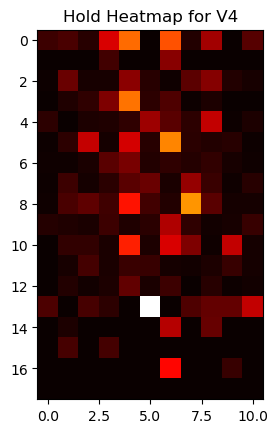

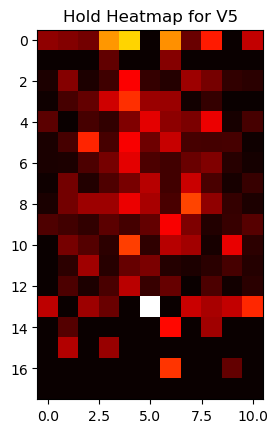

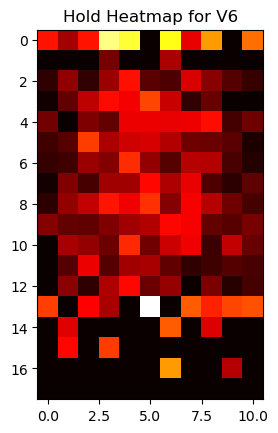

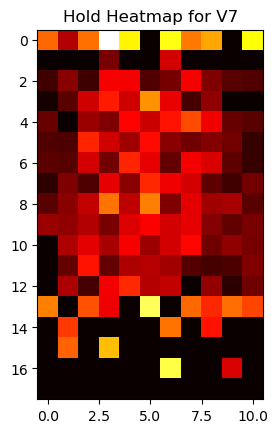

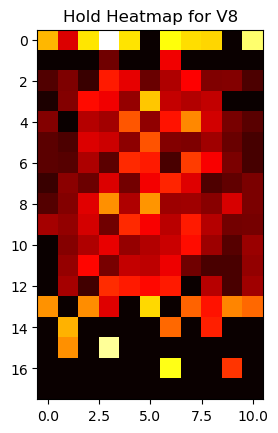

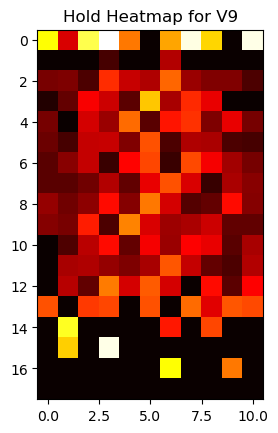

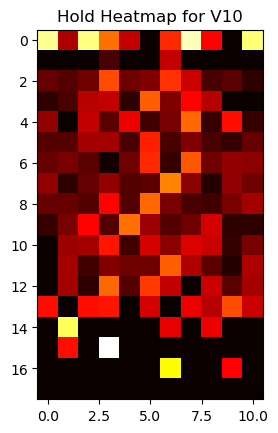

In [5]:
# Run the heatmaps for each grade
for grade in range(4, 11):
    gradeHeatMap(moondf, grade)
    plt.show()

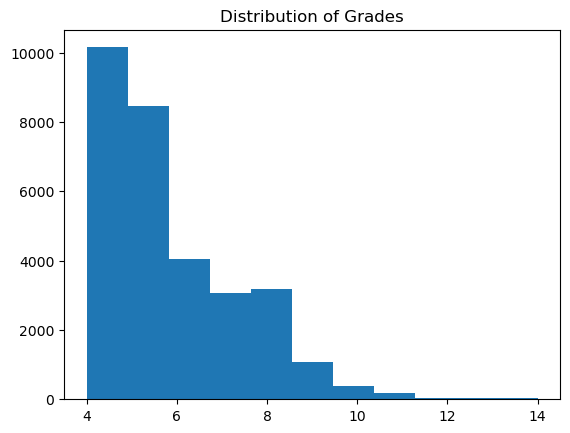

In [6]:
# Show the distribution of grades
plt.hist(moondf['grade'], bins=len(moondf['grade'].value_counts()))
plt.title('Distribution of Grades')
plt.show()

We might have to limit the data to V4-V8 or consolidate a V9+ category to make sure we have enough data for each class.

In [7]:
# Show the 5 most common holds for each grade
def MostCommonHolds(df, grade, num):
    gmap = np.zeros((11, 18))
    gradedf = df[df['grade'] == grade]
    hold_counts = []
    for hold in unique_holds:
        hold_counts.append(gradedf[f'{hold[0]}_{hold[1]}'].sum())
    hold_counts = np.array(hold_counts)
    for i in range(num):
        hold = unique_holds[np.argmax(hold_counts)]
        gmap[hold[0], hold[1]] = 1
        hold_counts[np.argmax(hold_counts)] = 0
    plt.title(f'5 Most Common Holds for V{grade}')
    plt.imshow(gmap.T[::-1], cmap='hot', interpolation='none')
    

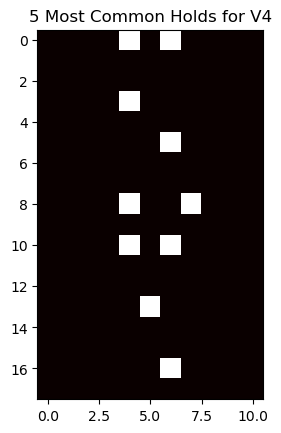

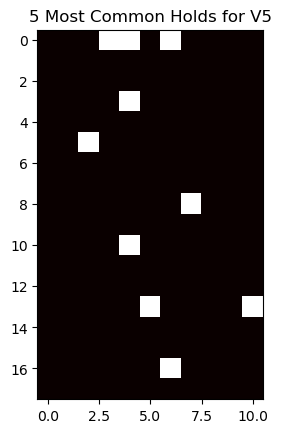

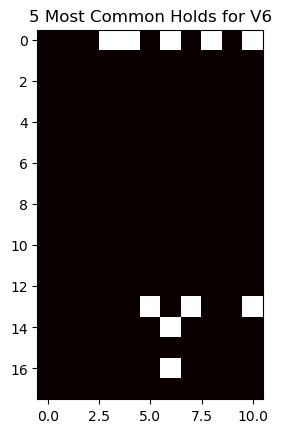

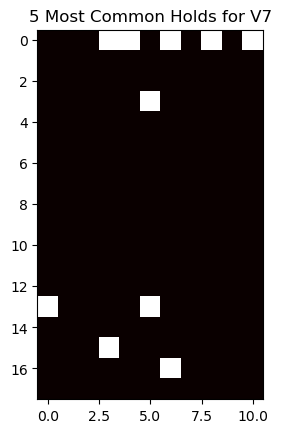

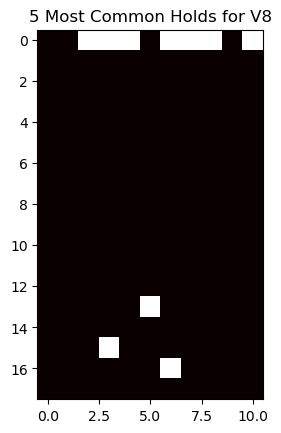

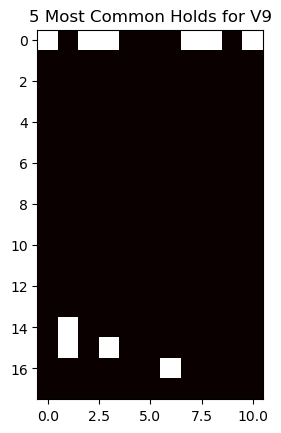

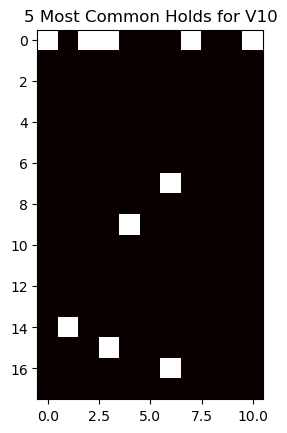

In [8]:
for i in range(4, 11):
    MostCommonHolds(moondf, i, 10)
    plt.show()